In [1]:
import numpy as np

In [2]:
def imstats( im ):
    for chan, i in zip( ['R', 'G', 'B'], range(3) ):
        plane = im[ :, :, i]
        print( "{} channel: min={}, max={}, mean={:0.2f}, std={:0.2f}, median={}".format(
            chan, plane.min(), plane.max(), plane.mean(), plane.std(), np.median( plane ) ) )

In [3]:
!head filelist.txt

/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_2_Other/51265-QUA-F2-RE-LS.tiff	01
/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_2_Other/51265-QUA-F2-RE-RS.tiff	01
/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_1_Control/57275-04-F2-RE-LS.tiff	01
/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_1_Control/57275-04-F2-RE-RS.tiff	01
/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_1_Control/56419-QUA-F2-RE-LS.tiff	01
/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_1_Control/56419-QUA-F2-RE-RS.tiff	01
/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_1_Control/55645-06-F2-RE-LS.tiff	01
/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_1_Control/55645-06-F2-RE-RS.tiff	01
/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_1_Control/60946-QUA-F2-RE-LS.tiff	01
/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_1_Control/60946-QUA-F2-RE-RS.tiff	01


In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [6]:
from skimage.io import imread

In [7]:
path1 = '/Volumes/LGDATA/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_1_Control/60946-QUA-F2-RE-RS.tiff'

In [8]:
path2 = '/Volumes/LGDATA/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_2_Other/51265-QUA-F2-RE-LS.tiff'

In [9]:
path3 = '/Volumes/LGDATA/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_1_Control/56419-QUA-F2-RE-LS.tiff'

In [10]:
midrow = 2300/2

In [11]:
midcol = 3400/2

In [12]:
side_length = 450*3

In [13]:
side_length

1350

In [14]:
topleftrow = int( midrow - side_length/2 )

In [15]:
topleftrow

475

In [16]:
topleftcol= int(midcol- side_length/2)

In [17]:
topleftcol

1025

In [18]:
im1 = imread( path1)[ topleftrow:topleftrow + side_length, topleftcol:topleftcol+side_length, :]

/usr/local/lib/python3.6/site-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


In [19]:
imstats( imread( path1))
imstats( im1)

/usr/local/lib/python3.6/site-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


R channel: min=0, max=230, mean=78.98, std=72.90, median=94.0
G channel: min=0, max=223, mean=49.06, std=45.55, median=60.0
B channel: min=0, max=190, mean=30.80, std=23.10, median=27.0
R channel: min=46, max=230, mean=164.16, std=21.22, median=161.0
G channel: min=24, max=142, mean=86.44, std=11.16, median=85.0
B channel: min=0, max=91, mean=33.33, std=8.96, median=32.0


In [20]:
im2 = imread( path2)[ topleftrow:topleftrow + side_length, topleftcol:topleftcol+side_length, :]

/usr/local/lib/python3.6/site-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


In [21]:
imstats( im2)

R channel: min=104, max=249, mean=215.47, std=11.02, median=214.0
G channel: min=44, max=172, mean=110.48, std=15.72, median=106.0
B channel: min=0, max=107, mean=21.73, std=17.01, median=20.0


In [22]:
im3 = imread( path3)[ topleftrow:topleftrow + side_length, topleftcol:topleftcol+side_length, :]

/usr/local/lib/python3.6/site-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


In [23]:
imstats( im3)

R channel: min=43, max=205, mean=143.13, std=17.36, median=141.0
G channel: min=21, max=161, mean=84.25, std=18.50, median=79.0
B channel: min=0, max=82, mean=21.79, std=7.18, median=20.0


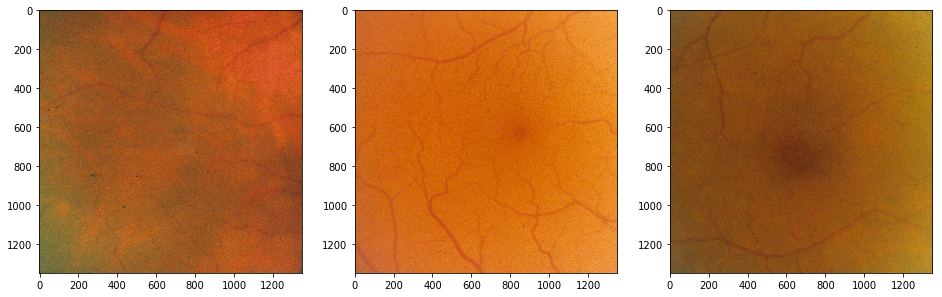

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
ax1.imshow(im1)
ax2.imshow(im2)
ax3.imshow(im3)

# SciPy image resize zoom

In [25]:
from scipy.ndimage import zoom

In [26]:
def zoomout(im):
    return np.dstack( ( zoom( im[:,:,0], 3) , zoom( im[:,:,1], 3), zoom( im[:,:,2], 3)) )

In [27]:
def zoomin(im):
    return np.dstack( ( zoom( im[:,:,0], 1/3) , zoom( im[:,:,1], 1/3), zoom( im[:,:,2], 1/3)) )

In [28]:
zoom_out1 = zoomout( im1 )

In [29]:
zoom_out1.shape

(4050, 4050, 3)

In [30]:
zoom_in1 = zoomin( im1)

In [31]:
zoom_in1.shape

(450, 450, 3)

In [32]:
imstats( zoom_in1)

R channel: min=62, max=230, mean=164.13, std=21.11, median=161.0
G channel: min=27, max=139, mean=86.44, std=11.05, median=85.0
B channel: min=1, max=93, mean=33.35, std=8.78, median=32.0


In [33]:
im1.shape

(1350, 1350, 3)

In [34]:
def compare( _im1, _im2, _im3 ):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
    ax1.imshow(_im1)
    ax2.imshow(_im2)
    ax3.imshow(_im3)

In [35]:
def compare_top_left( _im1, _im2, _im3 ):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
    ax1.imshow(_im1[ :int(len(_im1)/6), :int(len(_im1)/6), :])
    ax2.imshow(_im2[ :int(len(_im2)/6), :int(len(_im2)/6), :])
    ax3.imshow(_im3[ :int(len(_im3)/6), :int(len(_im3)/6), :])

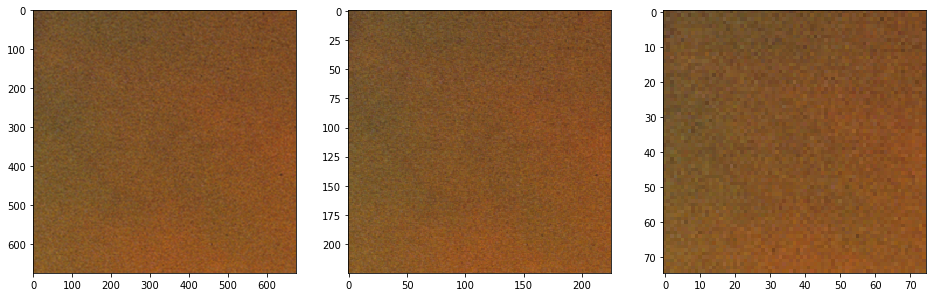

In [36]:
compare_top_left( zoom_out1, im1, zoom_in1 )

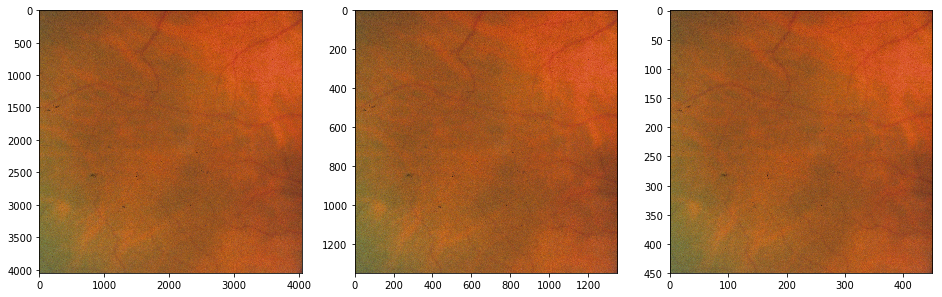

In [37]:
compare( zoom_out1, im1, zoom_in1 )

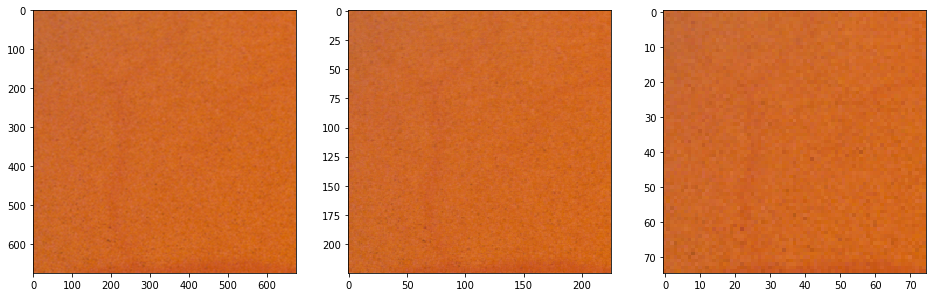

In [38]:
zoom_out2 = zoomout( im2 )
zoom_in2 = zoomin( im2 )
compare_top_left( zoom_out2, im2, zoom_in2 )

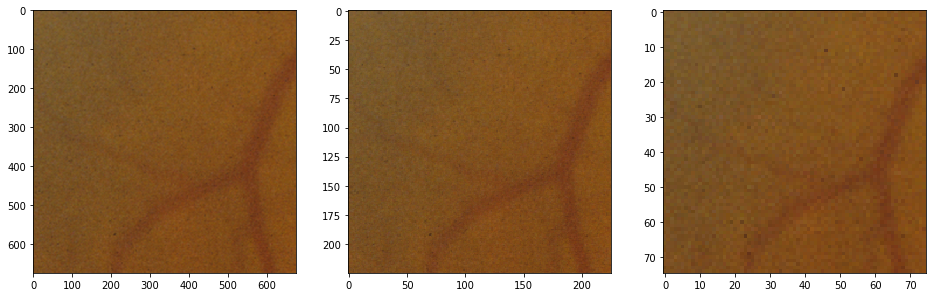

In [39]:
zoom_out3 = zoomout( im3 )
zoom_in3 = zoomin( im3 )
compare_top_left( zoom_out3, im3, zoom_in3 )

# Scipy scipy.misc.imresize

In [40]:
from scipy.misc import imresize

In [41]:
def zoomout(im):
    return np.dstack( ( imresize( im[:,:,0], 3,),
                       imresize( im[:,:,1], 3,),
                       imresize( im[:,:,2], 3,) ) )

In [42]:
def zoomin(im):
    return np.dstack( ( imresize( im[:,:,0], 1/3, interp='lanczos'),
                       imresize( im[:,:,1], 1/3, interp='lanczos'),
                       imresize( im[:,:,2], 1/3, interp='lanczos') ) )

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


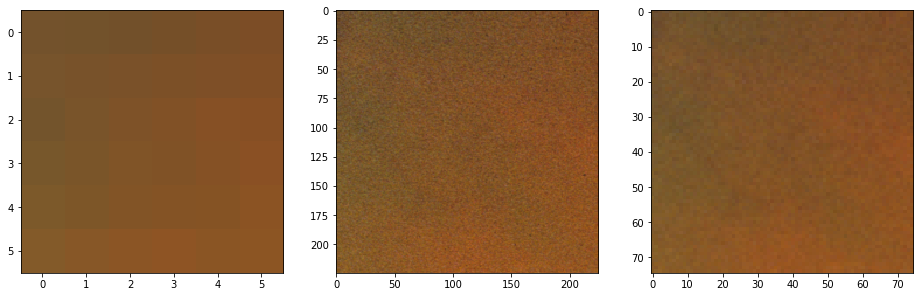

In [43]:
zoom_out1 = zoomout( im1 )
zoom_in1 = zoomin( im1 )
compare_top_left( zoom_out1, im1, zoom_in1 )

In [44]:
imstats( zoom_in1)

R channel: min=76, max=226, mean=164.16, std=20.27, median=161.0
G channel: min=43, max=126, mean=86.44, std=10.15, median=85.0
B channel: min=12, max=77, mean=33.33, std=7.10, median=32.0


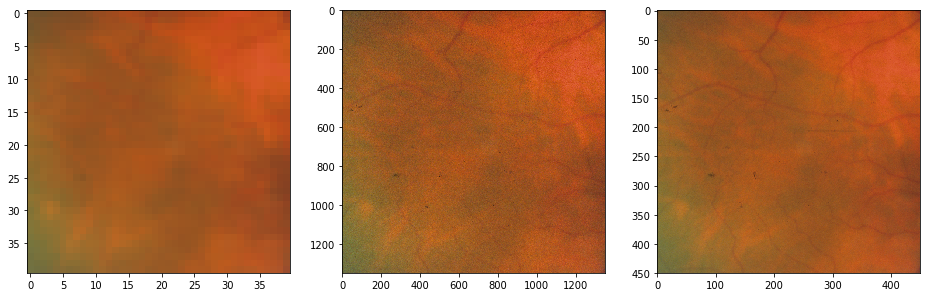

In [45]:
compare( zoom_out1, im1, zoom_in1 )

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


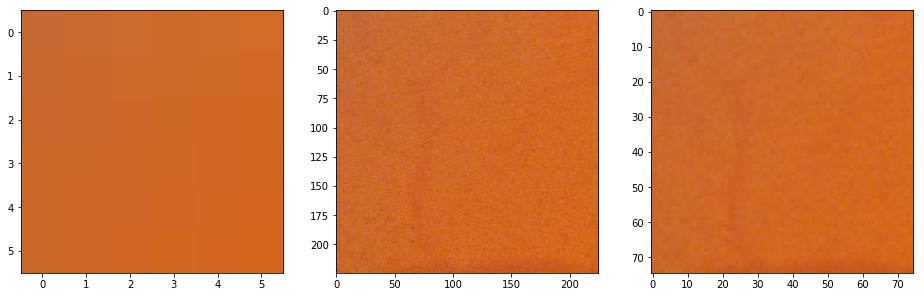

In [46]:
zoom_out2 = zoomout( im2 )
zoom_in2 = zoomin( im2 )
compare_top_left( zoom_out2, im2, zoom_in2 )

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


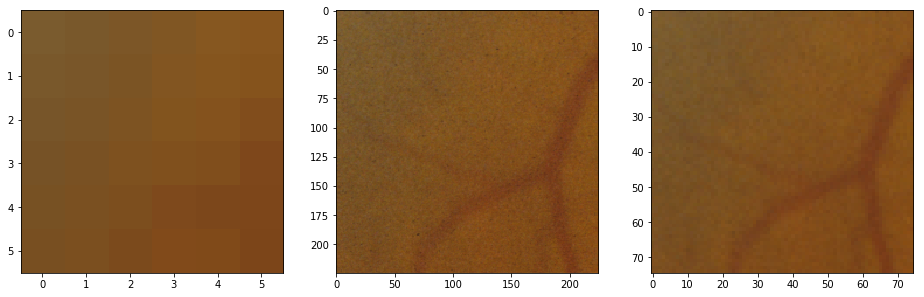

In [47]:
zoom_out3 = zoomout( im3 )
zoom_in3 = zoomin( im3 )
compare_top_left( zoom_out3, im3, zoom_in3 )

# Pyramid reduce

In [48]:
from skimage.transform import pyramid_reduce, pyramid_expand

In [49]:
def zoomout(im):
    return np.dstack( ( pyramid_expand( im[:,:,0], 3,),
                       pyramid_expand( im[:,:,1], 3,),
                       pyramid_expand( im[:,:,2], 3,) ) )

In [50]:
def zoomin(im):
    return np.dstack( ( pyramid_reduce( im[:,:,0], 3,),
                       pyramid_reduce( im[:,:,1], 3,),
                       pyramid_reduce( im[:,:,2], 3,) ) )

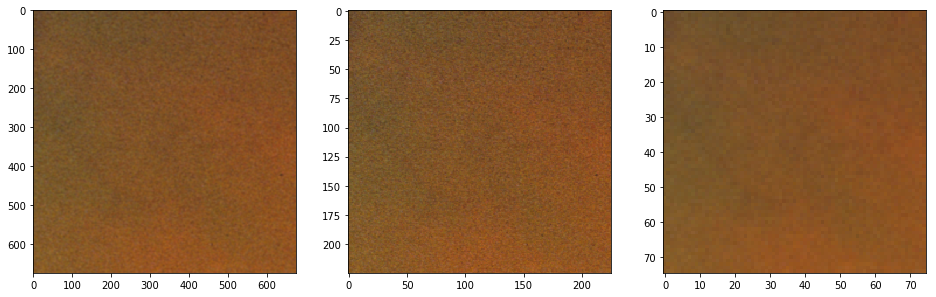

In [51]:
zoom_out1 = zoomout( im1 )
zoom_in1 = zoomin( im1 )
compare_top_left( zoom_out1, im1, zoom_in1 )

In [52]:
imstats( zoom_in1)

R channel: min=0.3061795601236363, max=0.8782617306802692, mean=0.64, std=0.08, median=0.6302567019418653
G channel: min=0.17290565070288555, max=0.4902550928194528, mean=0.34, std=0.04, median=0.3322495504921785
B channel: min=0.05091758159833333, max=0.296840849941585, mean=0.13, std=0.03, median=0.12643660520688213


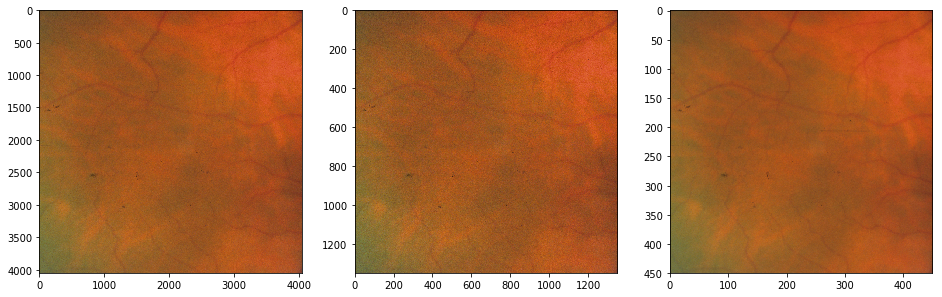

In [101]:
compare( zoom_out1, im1, zoom_in1 )

In [102]:
imstats( zoom_in1)

R channel: min=0.3061795601236363, max=0.8782617306802692, mean=0.64, std=0.08, median=0.6302567019418653
G channel: min=0.17290565070288555, max=0.4902550928194528, mean=0.34, std=0.04, median=0.3322495504921785
B channel: min=0.05091758159833333, max=0.296840849941585, mean=0.13, std=0.03, median=0.12643660520688213


In [103]:
 imstats( zoom_in1 * 255 )

R channel: min=78.07578783152725, max=223.95674132346866, mean=164.15, std=20.20, median=160.71545899517565
G channel: min=44.09094092923581, max=125.01504866896046, mean=86.44, std=10.08, median=84.72363537550552
B channel: min=12.983983307574999, max=75.69441673510417, mean=33.33, std=6.96, median=32.24133432775494


In [104]:
 imstats( np.around( zoom_in1 * 255 ) )

R channel: min=78.0, max=224.0, mean=164.15, std=20.21, median=161.0
G channel: min=44.0, max=125.0, mean=86.44, std=10.08, median=85.0
B channel: min=13.0, max=76.0, mean=33.33, std=6.96, median=32.0


In [106]:
 imstats( np.around( zoom_in1 * 255 ).astype(int) )

R channel: min=78, max=224, mean=164.15, std=20.21, median=161.0
G channel: min=44, max=125, mean=86.44, std=10.08, median=85.0
B channel: min=13, max=76, mean=33.33, std=6.96, median=32.0
